# 1. 决策回归树案例【线性回归对比】

## 1.1 创建数据可视化

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import graphviz

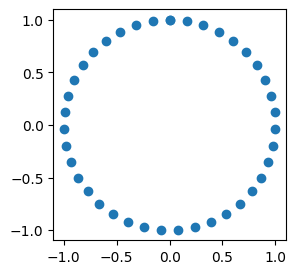

In [3]:
#               0~2π
X = np.linspace(0,2*np.pi,40).reshape(-1,1) # 数据，特征，训练数据
X_test = np.linspace(0,2*np.pi,199).reshape(-1,1) # 待测试数据，和训练数据有差异

# y 一个正弦波，余弦波，圆
y = np.c_[np.sin(X),np.cos(X)] # 正弦和余弦

# 没有设置y_test  那按理说 y_test = np.c_[np.sin(X_test),np.cos(X_test)]

# 画图--->圆
plt.figure(figsize=(3,3))
plt.scatter(y[:,0],y[:,1])

## 1.2 线性回归建模

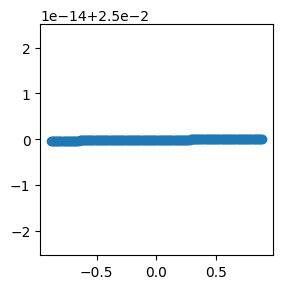

In [4]:
linear = LinearRegression()
linear.fit(X,y) #将数据交给算法，学习，希望算法找到规律

# X ----> y 是一个圆；预测X_test返回值y_ 如果预测好，也是圆
y_ = linear.predict(X_test)

plt.figure(figsize=(3,3))
plt.scatter(y_[:,0],y_[:,1])

## 1.3 决策树回归

Supported criteria
    are **"squared_error"** for the **mean squared error**, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node

(199, 2)


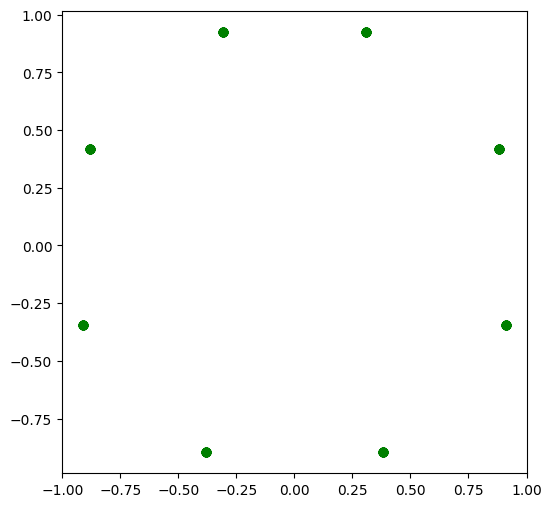

In [5]:
#                                      就是 mse
model = DecisionTreeRegressor(criterion='squared_error',max_depth=3)
model.fit(X,y)  # X是40个点 y是一个圆

y_ = model.predict(X_test) #X_test是199点【样本】，预测y_应该是一个圆

# 请问y_中有多少数据？？？
print(y_.shape)  # (199, 2)

plt.figure(figsize=(6,6))
plt.scatter(y_[:,0],y_[:,1],color = 'green')

In [46]:
y_[:5]

array([[0.08020564, 0.99352513],
       [0.08020564, 0.99352513],
       [0.08020564, 0.99352513],
       [0.08020564, 0.99352513],
       [0.08020564, 0.99352513]])

## 1.4 增加深度

(199, 2)


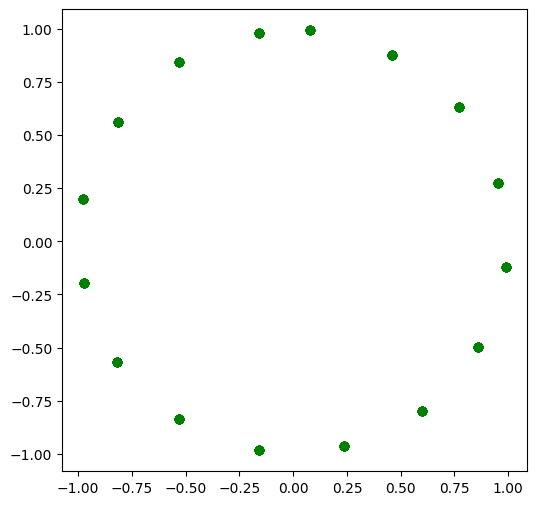

In [6]:
model = DecisionTreeRegressor(criterion='squared_error',max_depth=4)
model.fit(X,y)  # X是40个点 y是一个圆

y_ = model.predict(X_test) #X_test是199点【样本】，预测y_应该是一个圆

# 请问y_中有多少数据？？？
print(y_.shape)

plt.figure(figsize=(6,6))
plt.scatter(y_[:,0],y_[:,1],color = 'green')

## 1.5 决策树可视化

In [10]:
# 决策树形状 画的是训练集的数据
dot_data = tree.export_graphviz(model,filled=True)
graph = graphviz.Source(dot_data)
# graph
graph.render('./1-决策回归树', format = 'png')

'1-决策回归树.png'

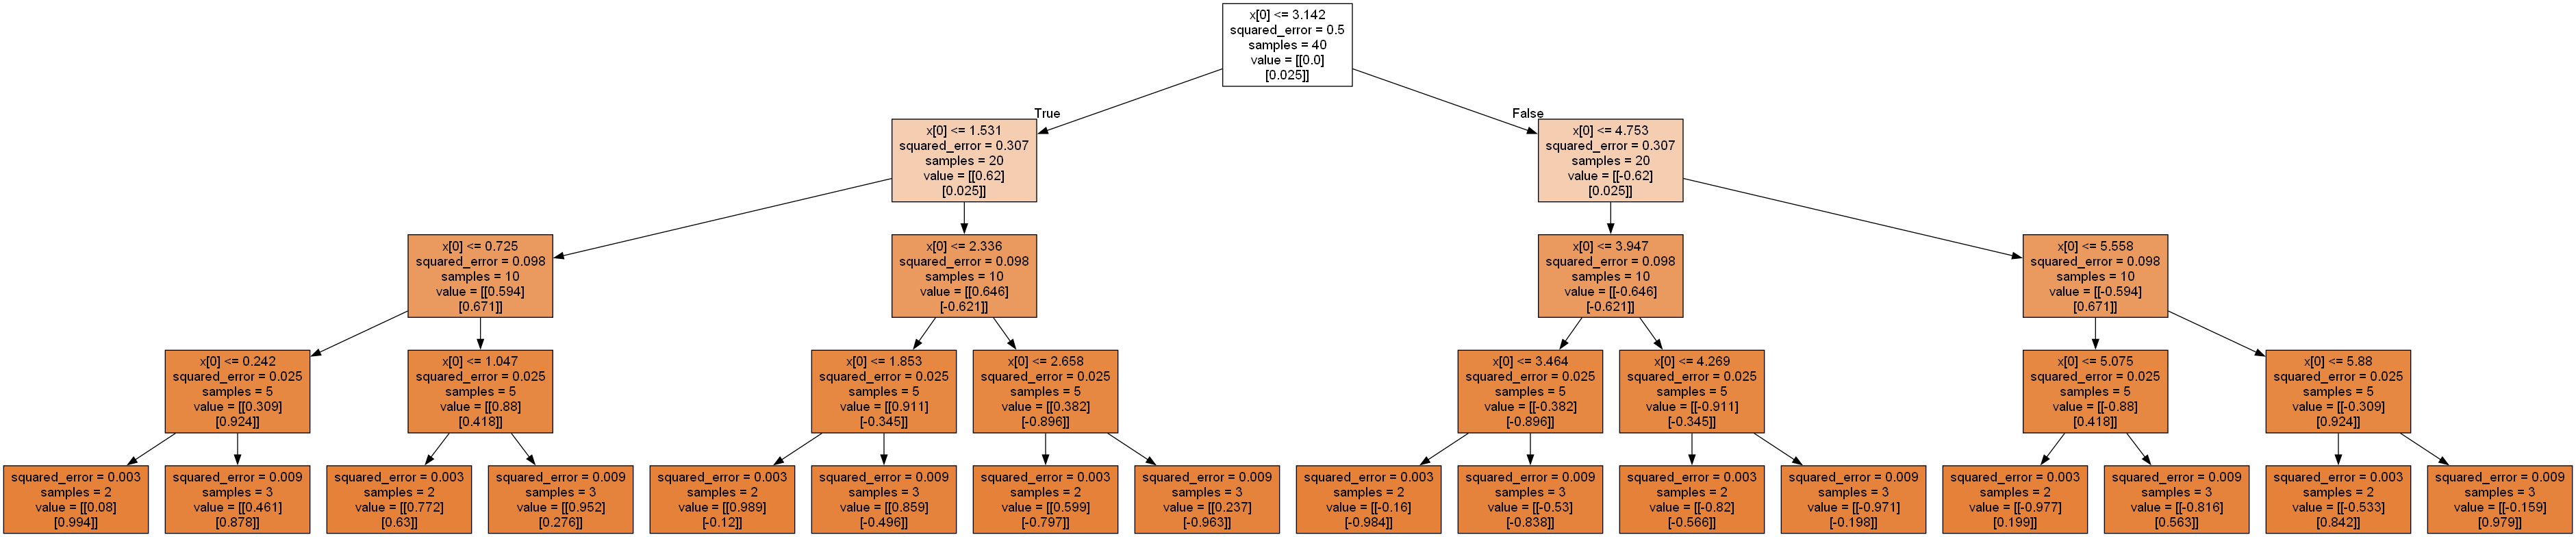

- 叶节点的个数 2^4=16

In [ ]:
# 图里的value

In [38]:
y.mean(axis=0).round(3)  # 根节点上那俩 value

array([0.   , 0.025])

In [48]:
cond = X <= 3.142

left = y[cond.reshape(-1)]
left.mean(axis = 0).round(3)

array([0.62 , 0.025])

In [49]:
cond = X <= 3.142

right = y[~cond.reshape(-1)]
right.mean(axis = 0).round(3)

array([-0.62 ,  0.025])

# 2. 决策树分裂原理【mse==squared_error】

## 2.1 整体MSE【未分裂】

In [32]:
# axis = 0表示计算列的平均值，【属性】
round(((y - y.mean(axis = 0))**2).mean(),1)  # 不太理解 公式不是减 yhat吗？ 这算啥？样本方差？
# 这里是训练集中的y 

0.5

In [35]:
from sklearn.metrics import mean_squared_error
print(round(((y - model.predict(X))**2).mean(),3))
mean_squared_error(y, model.predict(X))
# 这算什么？拟合后的？

0.006


0.0064525092546773005

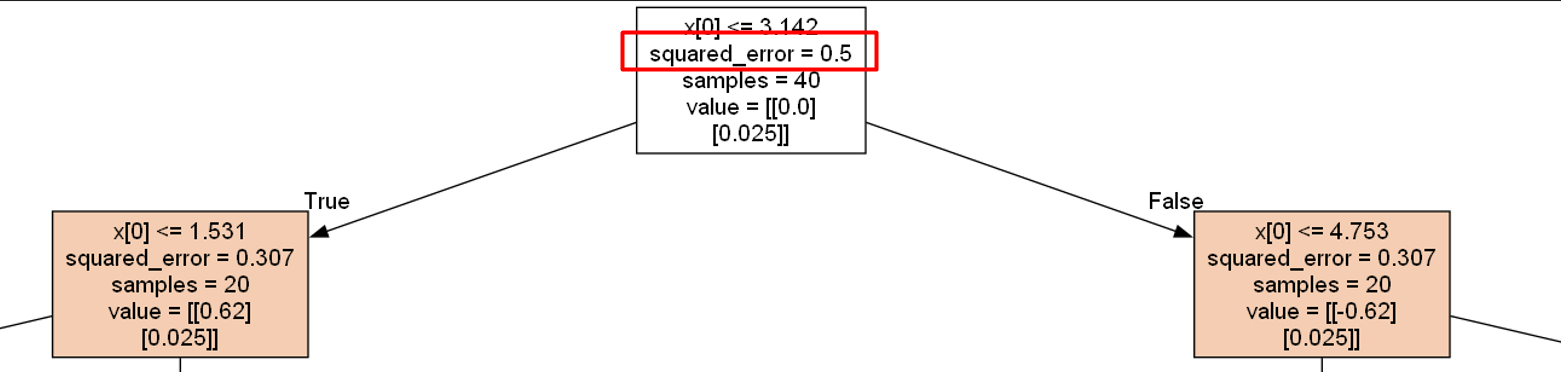

In [44]:
model.tree_.impurity

array([0.4996875 , 0.3072589 , 0.09834477, 0.02543339, 0.00323743,
       0.00859589, 0.02543339, 0.00323743, 0.00859589, 0.09834477,
       0.02543339, 0.00323743, 0.00859589, 0.02543339, 0.00323743,
       0.00859589, 0.3072589 , 0.09834477, 0.02543339, 0.00323743,
       0.00859589, 0.02543339, 0.00323743, 0.00859589, 0.09834477,
       0.02543339, 0.00323743, 0.00859589, 0.02543339, 0.00323743,
       0.00859589])

In [14]:
y.round(3)[:10]

array([[0.   , 1.   ],
       [0.16 , 0.987],
       [0.317, 0.949],
       [0.465, 0.885],
       [0.601, 0.799],
       [0.721, 0.693],
       [0.823, 0.568],
       [0.903, 0.429],
       [0.961, 0.278],
       [0.993, 0.121]])

In [11]:
y.mean(axis = 0).round(3) # 每列的平均值

array([0.   , 0.025])

In [12]:
y.mean(axis = 1).round(3)  # 每行的平均值

array([ 0.5  ,  0.574,  0.633,  0.675,  0.7  ,  0.707,  0.696,  0.666,
        0.619,  0.557,  0.479,  0.39 ,  0.29 ,  0.183,  0.071, -0.043,
       -0.155, -0.264, -0.366, -0.458, -0.539, -0.605, -0.656, -0.69 ,
       -0.706, -0.704, -0.683, -0.645, -0.59 , -0.52 , -0.436, -0.341,
       -0.237, -0.127, -0.014,  0.099,  0.21 ,  0.316,  0.413,  0.5  ])

## 2.2 验证第一次裂分后，左右两个节点的mse

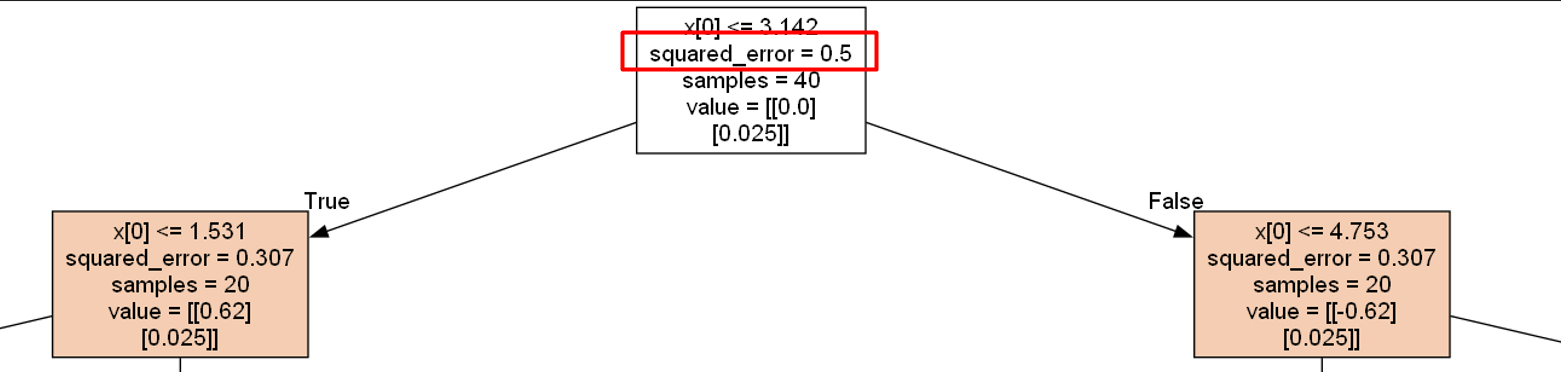

In [15]:
cond = (X <=3.142)
cond.shape

(40, 1)

In [16]:
cond = (X <=3.142).reshape(-1)  # 后面用的left.size是一维
cond.shape 

(40,)

In [18]:
left.size

40

In [19]:
# 0.307
left = y[cond]
right = y[~cond] # 非，True--->False；False --->True

# 计算左边的mse
round(((left - left.mean(axis = 0))**2).sum()/left.size,3)

# 前面的另一种算法 round(((y - y.mean(axis = 0))**2).mean(),1)

0.307

In [21]:
# 计算右边的mse
# round(((right - right.mean(axis = 0))**2).sum()/right.size,3)
((right - right.mean(axis = 0))**2).mean()

0.3072588991283228

## 2.3 手动计算最佳裂分点

In [23]:
X[:5]

array([[0.        ],
       [0.16110732],
       [0.32221463],
       [0.48332195],
       [0.64442926]])

In [24]:
X.ravel()

array([0.        , 0.16110732, 0.32221463, 0.48332195, 0.64442926,
       0.80553658, 0.96664389, 1.12775121, 1.28885852, 1.44996584,
       1.61107316, 1.77218047, 1.93328779, 2.0943951 , 2.25550242,
       2.41660973, 2.57771705, 2.73882436, 2.89993168, 3.061039  ,
       3.22214631, 3.38325363, 3.54436094, 3.70546826, 3.86657557,
       4.02768289, 4.1887902 , 4.34989752, 4.51100484, 4.67211215,
       4.83321947, 4.99432678, 5.1554341 , 5.31654141, 5.47764873,
       5.63875604, 5.79986336, 5.96097068, 6.12207799, 6.28318531])

In [36]:
# DecisionTreeRegressor 核心代码，就是，下面的代码
# 难的知识，没法教
# 理解 + 练习
split_result = {}
mse_lower = 0.5 # 未分裂时，mse，最大的
for i in range(len(X) - 1):
    split = round(X[i:i+2].mean(),3) # 裂分点
    cond = (X <= split).reshape(-1)
    left = y[cond]  # 注意用的是目标值 y
    right = y[~cond]
    mse_left = ((left - left.mean(axis = 0))**2).mean()
    mse_right = ((right - right.mean(axis = 0))**2).mean()
    # 计算左右叶节点比例
    left_percent = cond.sum()/cond.size 
    right_percent = 1 - left_percent
    # 计算整体
    mse = mse_left * left_percent + mse_right * right_percent
#     print(mse,left_percent,right_percent)
    if mse < mse_lower:
        split_result.clear()
        split_result[split] = mse
        mse_lower = mse # 更新记录最小 mse变量
print('最佳裂分条件：',split_result)

最佳裂分条件： {3.142: 0.3072588991283228}


In [38]:
cond.sum()/cond.size

0.5

# 3. 决策回归树 VS 线性回归

## 3.1 加载数据

In [47]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

diabetes = datasets.load_diabetes() # 糖尿病
X = diabetes['data']
y = diabetes['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 911)


In [ ]:
diabetes

## 3.2 线性回归

In [48]:
linear = LinearRegression()
linear.fit(X_train,y_train)
linear.score(X_test,y_test)

0.41394315401409987

## 3.3 决策树

In [49]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

-0.0911397830808649

- 决策树在糖尿病这个数据集场景下，表现不如线性回归
- 'feature_names': ['age',
  'sex',
  'bmi',
  'bp',
  's1',
  's2',
  's3',
  's4',
  's5',
  's6']
- 数据和目标值之间存在线性关系
- 决策树不能提取线性关系

## 3.4 筛选超参数

Text(0.5, 1.0, '决策树R^2随着深度变化')

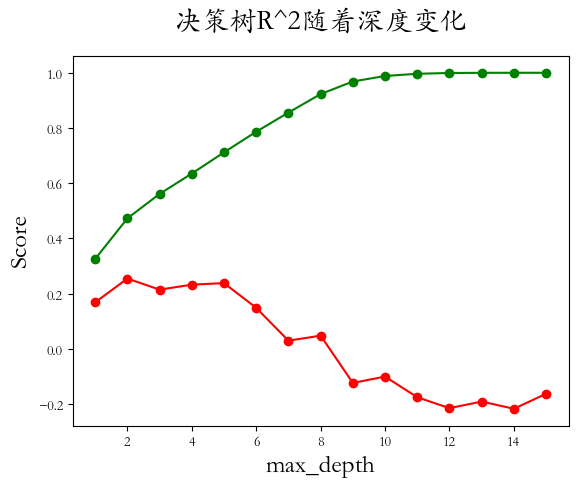

In [51]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'STKaiti'

max_depth = np.arange(1,16)
score1 = [] # 测试
score2 = [] # 训练
for d in max_depth:
    model = DecisionTreeRegressor(max_depth = d)
    model.fit(X_train,y_train)
    score1.append(model.score(X_test,y_test))
    score2.append(model.score(X_train,y_train))
    
plt.plot(max_depth,score1,'ro-')
plt.plot(max_depth,score2,'go-')  # 随着 max_depth的提升而提升，过拟合
plt.xlabel('max_depth',fontsize = 18)
plt.ylabel('Score',fontsize = 18)
plt.title('决策树R^2随着深度变化',pad = 20,fontsize = 20)